# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студентки гр. 0382 Деткова Анна и Рубежова Наталия. Вариант №11.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Формула численного дифференцирования 1-го порядка**:
$y_n= \frac {s_{n+1} - s_{n−1}} {2h},\ h=T=1$.

Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда:<br>
$H(\omega) = i\sin (\omega)$<br>


**Формула трапеций**: $y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$.<br>

 Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда:<br>

 $H(\omega) = \frac {\cos {\frac \omega 2}}{2i \sin {\frac \omega 2}}$<br>


 **Формула прямоугольников**: $y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0$.<br>
 Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда:<br>

 $H(\omega) = \frac 1 {2i \sin {\frac \omega t}}$<br>


  **Формула Симпсона**: $y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$<br>

 Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда:<br>

 $H(\omega) = \frac {\cos {\omega} + 2}{3i \sin {\omega}}$<br>

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt

#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$  непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_kt+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1 \pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

Исходный аналоговый сигнал: $$s(t)=\sum_{k=0}^{10} A_k \cos (\omega_k t + \phi_k)$$<br>
Сформированный дискретный сигнал: $$x_k=s(t_k), k=0...N, N=31,\\t_k-t_{k-1}=T=1$$

In [61]:
# Параметры сигнала
N = 31  # количество отсчетов
T = 1  # шаг дискретизации
omega_step = 0.1 * np.pi  # шаг изменения частоты
num_harmonics = 11  # количество гармоник

# Генерация случайных амплитуд и начальных фаз
A_k = np.random.randint(1, 12, num_harmonics)
print("Амплитуды гармоник (коэффициенты линейной комбинации) A_k:", A_k)
phi_k = np.random.uniform(0, 0.5, num_harmonics)
print("Начальные фазы phi_k:", phi_k)
omega_k = np.array([omega_step * i for i in range(num_harmonics)])
print("Частоты гармоник omega_k:", omega_k)

# Нормализация коэффициентов
A_k = A_k / sum(A_k)
print("Нормализованные амплитуды гармоник (нормализованные коэффициенты линейной комбинации) A_k:", A_k)

# Генерация дискретного времени
t_discr = np.arange(0, N*T + T, T)

# Генерация аналогового времени с шагом 0.1
t_analog = np.arange(0, N + 0.1, 0.1)

# Формирование  сигнала
def s(t):
  signal = 0
  for i in range(num_harmonics):
    signal += A_k[i] * np.cos(omega_k[i] * t + phi_k[i])
  return signal

s_analog = np.array([s(t) for t in t_analog])
x_discr = np.array([s(t) for t in t_discr])

Амплитуды гармоник (коэффициенты линейной комбинации) A_k: [ 2 11  1  4  8 10 10  8  3  5  4]
Начальные фазы phi_k: [0.18080958 0.16868112 0.25210701 0.0518281  0.05257452 0.19838784
 0.09600495 0.46788857 0.29655497 0.32755023 0.43107408]
Частоты гармоник omega_k: [0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265]
Нормализованные амплитуды гармоник (нормализованные коэффициенты линейной комбинации) A_k: [0.03030303 0.16666667 0.01515152 0.06060606 0.12121212 0.15151515
 0.15151515 0.12121212 0.04545455 0.07575758 0.06060606]


---

#### 2. Визуализировать исходные аналоговый и дискретизированный сигналы.

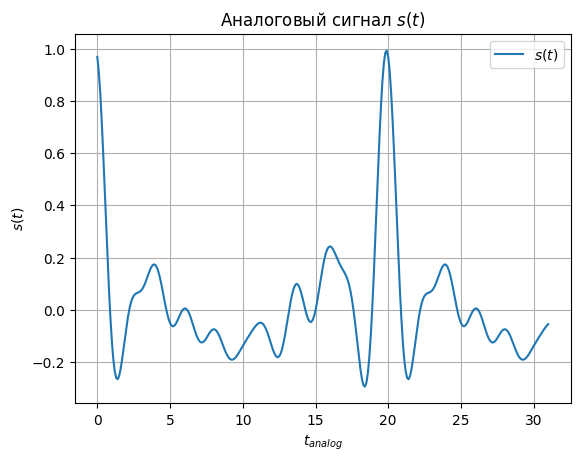

In [62]:
plt.plot(t_analog, s_analog, label=r'$s(t)$')
plt.xlabel('$t_{analog}$')
plt.ylabel(r'$s(t)$')
plt.legend()
plt.title(r'Аналоговый сигнал $s(t)$')
plt.grid()
plt.show()

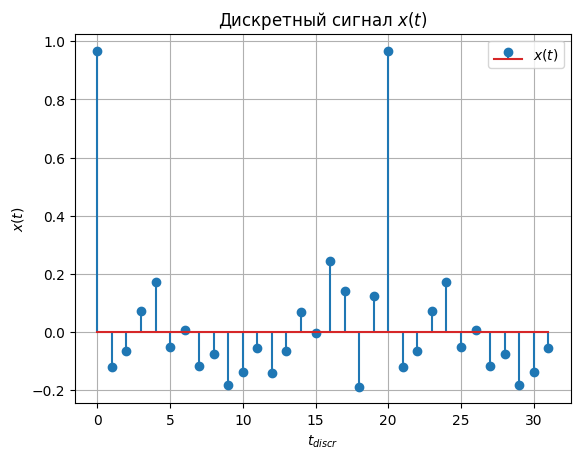

In [63]:
plt.stem(t_discr, x_discr, label=r'$x(t)$')
plt.xlabel('$t_{discr}$')
plt.ylabel(r'$x(t)$')
plt.legend()
plt.title(r'Дискретный сигнал $x(t)$')
plt.grid()
plt.show()



---

#### 3. С помощью ДПФ (дискретного преобразования Фурье) найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Если дискретный сигнал представить в виде функции от времени: $$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$

То, пользуясь свойствами дискретного преобразования Фурье (ДПФ), *__спектр дискретного сигнала__* можно представить в виде периодической функции с периодом равным $2\pi$: $$S(\omega) = \sum_{k} x_k e^{-i\omega k}, \ где \  k \in [0, N]$$
$$X(n)=S(\frac{2\pi n}{N})= S(\omega_d \frac n N) = \sum_{k} x_k e^{-i \frac{2 \pi n}{N} k}, \quad n=0,1,2, \ldots, N$$

omega=2pi*n/(N+1):
 [-3.14159265 -2.94524311 -2.74889357 -2.55254403 -2.35619449 -2.15984495
 -1.96349541 -1.76714587 -1.57079633 -1.37444679 -1.17809725 -0.9817477
 -0.78539816 -0.58904862 -0.39269908 -0.19634954  0.          0.19634954
  0.39269908  0.58904862  0.78539816  0.9817477   1.17809725  1.37444679
  1.57079633  1.76714587  1.96349541  2.15984495  2.35619449  2.55254403
  2.74889357  2.94524311  3.14159265]


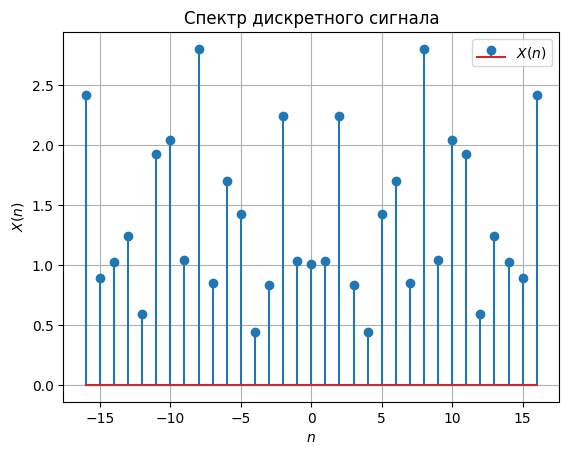

In [64]:
n = np.arange(-N // 2, N // 2 + 2, T)
frec = 2 * np.pi * n / (N+1)
print("omega=2pi*n/(N+1):\n", frec)

# Дискретное преобразование Фурье (discrete fourier transform - dft)
def dft(omega, signal):
  spectr_sum=0
  # суммируем для каждого x_k
  for k in range(0, N+1):
    spectr_sum += signal[k] * np.exp(-1j * omega * k)
  return spectr_sum

# Применим ДПФ к дискретному сигналу
X_dft = [np.abs(dft(omega, x_discr)) for omega in frec]

plt.stem(n, X_dft, label=r'$X(n)$')
plt.xlabel('$n$')
plt.ylabel(r'$X(n)$')
plt.legend()
plt.title(r'Спектр дискретного сигнала')
plt.grid()
plt.show()

---

#### 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Применим для дискретного сигнала *__сглаживание прямой__* по 5-ти и 9-ти точкам:

В общем случае: <br>
$$y_n=\frac{1}{2m+1} \sum_{k=n-m}^{n+m} s_k=\frac{1}{2m+1}(s_{n-m}+s_{n-m+1}+...+s_{n+m-1}+s_{n+m})$$

Тогда, для 5 точек: $y_k = \frac{x_{k-2}+x_{n-1}+x_{k}+x_{n+1}+x_{k+2}}{5}$

Для 9 точек: $y_k = \frac{x_{k-4}+x_{k-3}+x_{k-2}+x_{k-1}+x_{k}+x_{k+1}+x_{k+2}+x_{k+3}+x_{k+4}}{9}$

Формулы для $H(ω)$ – передаточной функции (частотной характеристики) фильтра:

$H_5(\omega)= 0.2 (1 + 2\cos(\omega) + 2\cos(2\omega))$<br>
$H_9(\omega)=\frac 1 9 (1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega))$<br>

Реализуем функции, применяющие линейные сглаживания к исходному дискретному сигналу.

In [65]:
# Линейное сглаживание по 5 точкам
def linear_5(signal):
  smooth_signal = np.zeros(len(signal))
  for i in range(2, len(signal)-2):
    smooth_signal[i] = (signal[i-2] + signal[i-1] + signal[i] + signal[i+1] + signal[i+2])/5
  return smooth_signal

# Линейное сглаживание по 9 точкам
def linear_9(signal):
  smooth_signal = np.zeros(len(signal))
  for i in range(4, len(signal)-4):
    smooth_signal[i] = (signal[i-4] + signal[i-3] + signal[i-2] + signal[i-1] + signal[i] + signal[i+4] + signal[i+3] + signal[i+2] + signal[i+1])/9
  return smooth_signal

# filtered_linear_5 = np.convolve(x_discr, np.ones(5), 'same') / 5

filtered_linear_5 = linear_5(x_discr)
filtered_linear_9 = linear_9(x_discr)
# filtered_linear_9 = np.convolve(x_discr, np.ones(9), 'same') / 9

---

#### 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

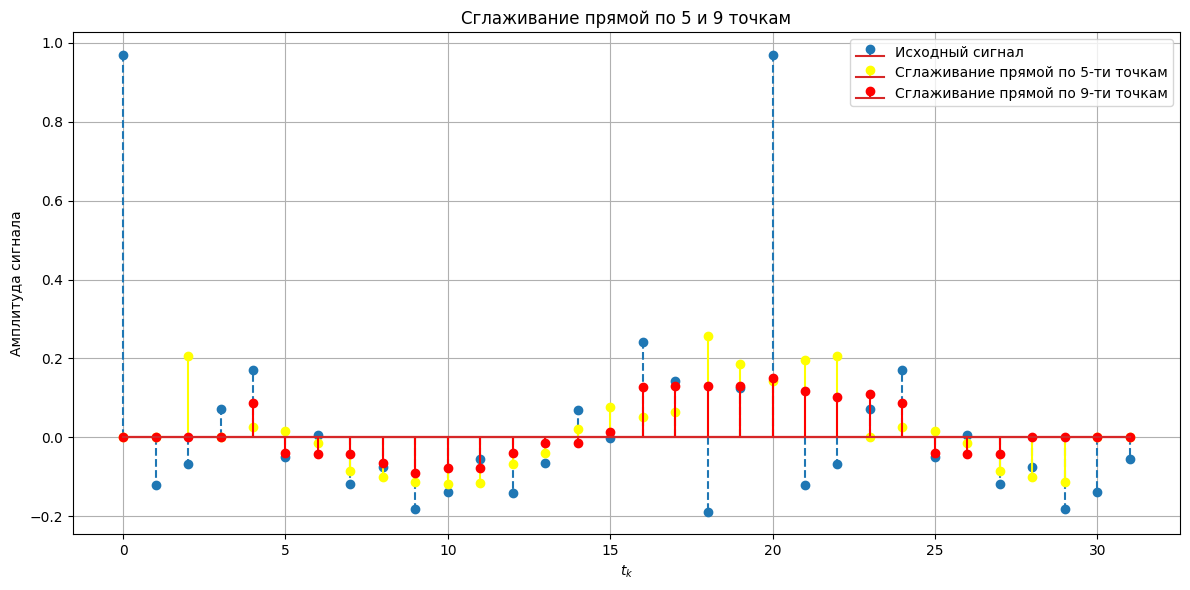

In [66]:
plt.figure(figsize=(12, 6))
plt.title('Сглаживание прямой по 5 и 9 точкам')
plt.xlabel('$t_k$')
plt.ylabel('Амплитуда сигнала')
plt.stem(t_discr, x_discr, '--',label='Исходный сигнал')
plt.stem(t_discr, filtered_linear_5, 'yellow', label='Сглаживание прямой по 5-ти точкам')
plt.stem(t_discr, filtered_linear_9, 'red', label='Сглаживание прямой по 9-ти точкам')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

---

#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

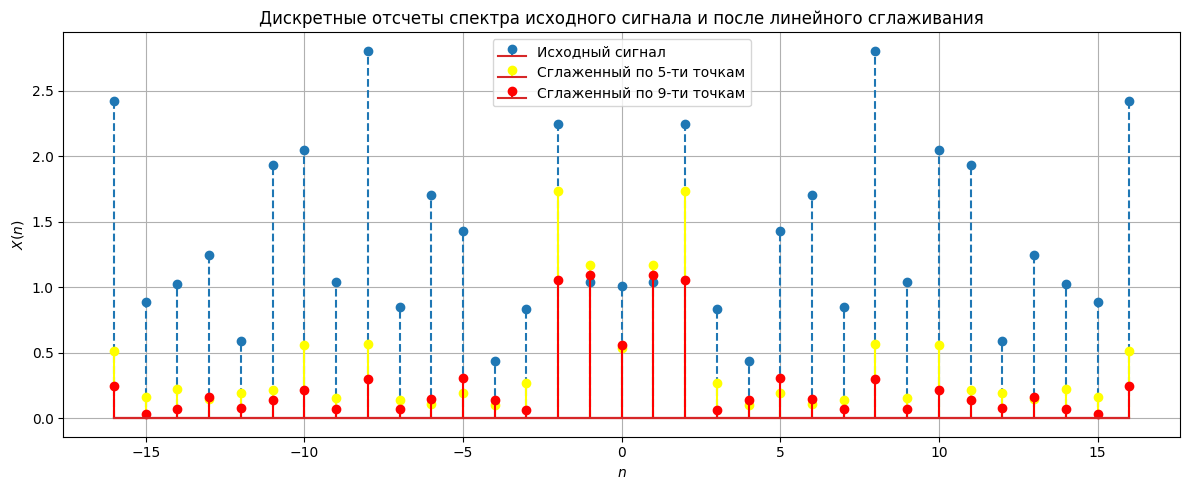

In [67]:
filtered_linear_5_dft = [np.abs(dft(omega, filtered_linear_5)) for omega in frec]
filtered_linear_9_dft = [np.abs(dft(omega, filtered_linear_9)) for omega in frec]

plt.figure(figsize=(12, 5))
plt.title('Дискретные отсчеты спектра исходного сигнала и после линейного сглаживания')
plt.xlabel('$n$')
plt.ylabel('$X(n)$')
plt.stem(n, X_dft, '--',label='Исходный сигнал')
plt.stem(n, filtered_linear_5_dft, 'yellow',label='Сглаженный по 5-ти точкам')
plt.stem(n, filtered_linear_9_dft, 'red',label='Сглаженный по 9-ти точкам')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

---

#### 7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

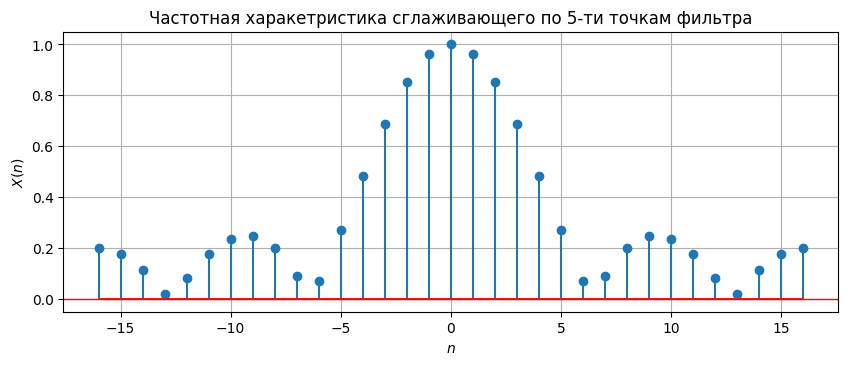

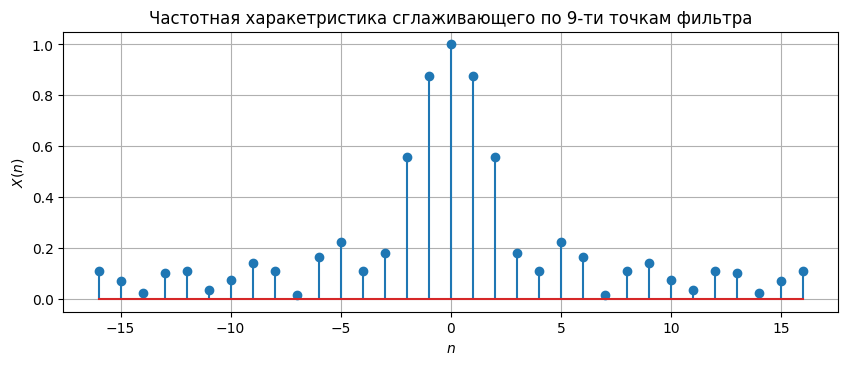

In [68]:
# передаточная функция фильтра сглаживания по 5-ти точкам
def H_5(omega):
  return 0.2 * (1 + 2 * np.cos(omega) + 2 * np.cos(2 * omega))

# передаточная функция фильтра сглаживания по 9-ти точкам
def H_9(omega):
  return (1 + 2 * np.cos(omega) + 2 * np.cos(2 * omega) + 2 * np.cos(3 * omega) + 2 * np.cos(4 * omega)) / 9

H_5_omega = [np.abs(H_5(omega)) for omega in frec]
H_9_omega = [np.abs(H_9(omega)) for omega in frec]

plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.stem(n, H_5_omega)
plt.axhline(y=0.0, color='red', linewidth=1.0)
plt.title('Частотная харакетристика сглаживающего по 5-ти точкам фильтра')
plt.xlabel('$n$')
plt.ylabel('$X(n)$')
plt.grid()

plt.figure(figsize=(10,8))
plt.subplot(2, 1, 2)
plt.stem(n, H_9_omega)
plt.title('Частотная харакетристика сглаживающего по 9-ти точкам фильтра')
plt.xlabel('$n$')
plt.ylabel('$X(n)$')
plt.grid()


plt.show()


Оценив графики спектра дискретного входного сигнала, а также спектров дискретных сигналов на выходе из фильтров сглаживания по 5-ти и 9-ти точкам, можем сделать вывод, что значения спектра выходного сигнала относительно входного отображают характер передаточной функции (сопоставимы со значениями $H(\omega) = H(2 \pi \frac n N)$).

На частотах достаочно далеких от 0 частоты подавляются сильнее, чем в окрестности точки 0, что согласуется с частотными характеристиками обоих фильтров.

#### 8. Повторить п. 4–7 для следующих фильтров:

a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.<br>
b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

##### a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

###### 4a. Для дискретного сигнала применить дискретный фильтр, соответствующий численному дифференцированию 1-го порядка, представить формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Применим для дискретного сигнала дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:

Запишем формулу численного дифференцирования 1-го порядка дискретной форме для последовательности $x_n$ с шагом дикретизации $h$ (формула "разности посередине": $$\frac {dx_n} {dt} = \frac {x_{n+1} - x_{n-1}} {2h}$$

Тогда дискретный фильтр, реализующий численное дифференцирование 1-го порядка, может быть представлен с использованием разностной схемы. Если $s_n$ - входной сигнал, $y_n$ - выходной сигнал, то формула для простейшей разностной схемы численного дифференцирования может быть записана как ($h=T=1$):
$$y_n= \frac {s_{n+1} - s_{n−1}} 2$$


Пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$, тогда:<br>
$\begin{cases}
   y_{n} = \frac {e^{i \omega (n+1)} - e^{i \omega (n - 1)}} 2\\
   y_{n} = H(\omega)e^{i \omega n}
 \end{cases}$<br>

 $H(\omega)e^{i \omega n} = \frac {e^{i \omega (n + 1)} - e^{i \omega (n - 1)}} 2$<br>

 $H(\omega) = \frac {e^{i \omega} - e^{- i \omega}} 2 = i \sin(\omega)$<br>

Формула для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра:

$H(\omega) = i\sin (\omega)$<br>

Реализуем функцию, применяющую дискретный фильтр, реализующий численное дифференцирование 1-го порядка.

In [69]:
# дискретный фильтр, реализующий численное дифференцирование 1-го порядка
def num_diff(signal):
  filtered_signal = np.zeros(len(signal))
  for i in range(1, len(signal)-1):
    filtered_signal[i] = (signal[i+1] - signal[i-1]) / 2
  return filtered_signal

filtered_num_diff = num_diff(x_discr)

###### 5a. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

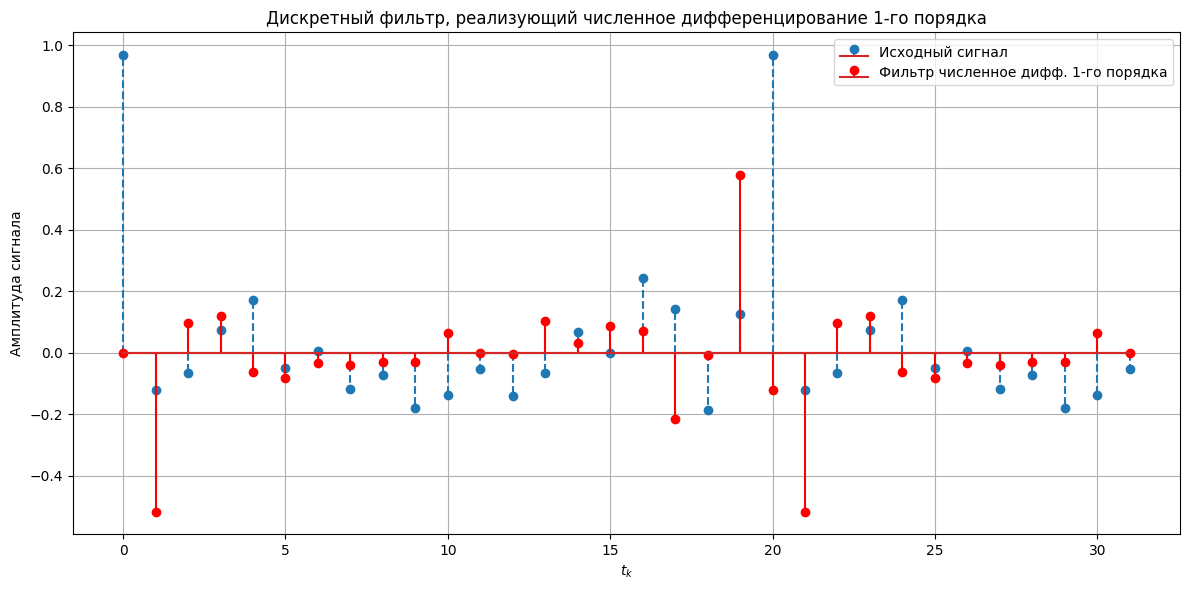

In [70]:
plt.figure(figsize=(12, 6))
plt.title('Дискретный фильтр, реализующий численное дифференцирование 1-го порядка')
plt.xlabel('$t_k$')
plt.ylabel('Амплитуда сигнала')
plt.stem(t_discr, x_discr, '--',label='Исходный сигнал')
plt.stem(t_discr, filtered_num_diff, 'red', label='Фильтр численное дифф. 1-го порядка')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

###### 6a. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

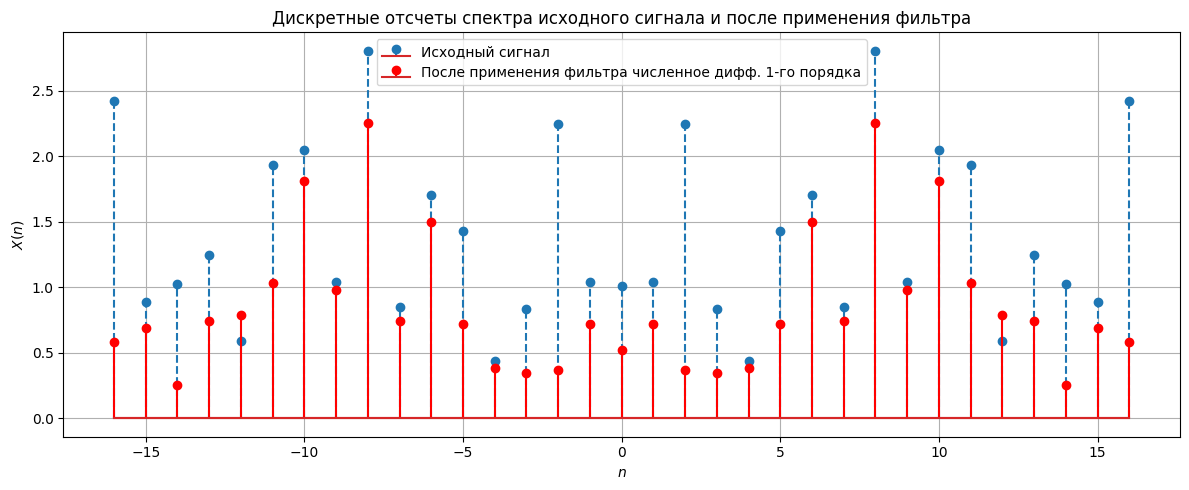

In [71]:
filtered_num_diff_dft = [np.abs(dft(omega, filtered_num_diff)) for omega in frec]

plt.figure(figsize=(12, 5))
plt.title('Дискретные отсчеты спектра исходного сигнала и после применения фильтра')
plt.xlabel('$n$')
plt.ylabel('$X(n)$')
plt.stem(n, X_dft, '--',label='Исходный сигнал')
plt.stem(n, filtered_num_diff_dft, 'red',label='После применения фильтра численное дифф. 1-го порядка')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

###### 7a. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

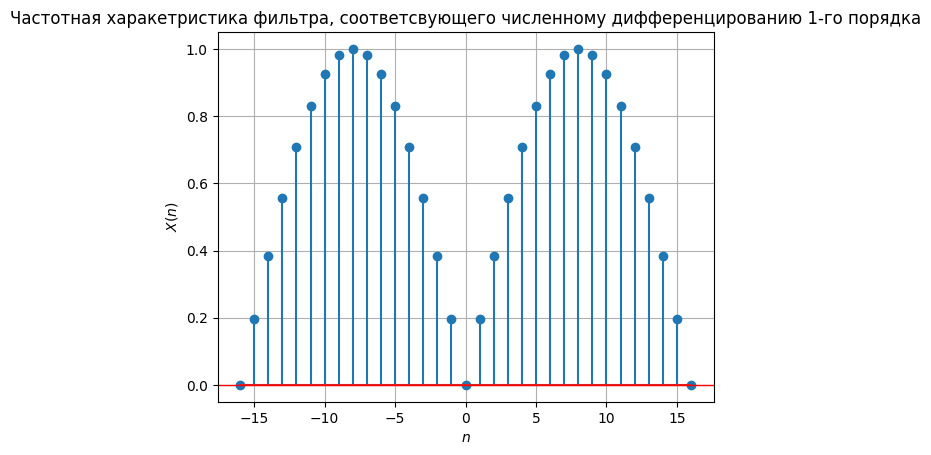

In [72]:
# передаточная функция фильтра, соответсвующего дифференцированию 1-го порядка
def H_diff(omega):
  return 1j * np.sin(omega)

H_diff_omega = [np.abs(H_diff(omega)) for omega in frec]

plt.stem(n, H_diff_omega)
plt.axhline(y=0.0, color='red', linewidth=1.0)
plt.title('Частотная харакетристика фильтра, соответсвующего численному дифференцированию 1-го порядка')
plt.xlabel('$n$')
plt.ylabel('$X(n)$')
plt.grid()
plt.show()

Оценив графики спектра дискретного входного сигнала, а также спектр дискретного сигнала на выходе из фильтра, соответствующего дифференцированию 1-го порядка, можем сделать вывод, что значения спектра выходного сигнала относительно входного отображают характер передаточной функции (сопоставимы со значениями $H(\omega) = H(2 \pi \frac n N)$).

По графику дискретных отсчетов спектра можно видеть, что меньше всего воздействия оказывается на средние частоты, в то время как низкие и высокие активно подавляются, такое поведение согласуется с частотной характеристикой фильтра.

---

##### b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

###### 4b. Для дискретного сигнала применить дискретный фильтр, соответствующий численному интегрированию по формуле прямоугольников, трапеций и Симпсона, представить формулы для $H(\omega)$ - передаточных функций (частотных характеристик) фильтров.

* Дискретный фильтр, реализующий численное интегрирование с помощью формулы прямоугольников. Формула прямоугольников: $$y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0$$
Формула для $H(ω)$  – передаточной функции (частотной характеристики) фильтра: $H(\omega) = \frac 1 {2i \sin {\frac \omega 2}}$<br>

* Дискретный фильтр, реализующий численное интегрирование с помощью формулы трапеций. Формула трапеций: $$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$$
Формула для $H(ω)$  – передаточной функции (частотной характеристики) фильтра: $H(\omega) = \frac {\cos {\frac \omega 2}}{2i \sin {\frac \omega 2}}$<br>

* Дискретный фильтр, реализующий численное интегрирование с помощью формулы Симпсона. Формула Симпсона: $$y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$$
Формула для $H(ω)$  – передаточной функции (частотной характеристики) фильтра: $H(\omega) = \frac {\cos {\omega} + 2}{3i \sin {\omega}}$<br>

In [73]:
# дискретный фильтр, реализующий численное интегрирование по формуле прямоугольников
def num_integr_rect(signal):
  filtered_signal = np.zeros(len(signal))
  for i in range(0, len(signal)-1):
    filtered_signal[i + 1] = filtered_signal[i] + signal[i + 1]
  return filtered_signal

# дискретный фильтр, реализующий численное интегрирование по формуле трапеций
def num_integr_trap(signal):
  filtered_signal = np.zeros(len(signal))
  for i in range(0, len(signal)-1):
    filtered_signal[i + 1] = filtered_signal[i] + (signal[i] + signal[i + 1]) / 2
  return filtered_signal

# дискретный фильтр, реализующий численное интегрирование по формуле Симпсона
def num_integr_Simp(signal):
  filtered_signal = np.zeros(len(signal))
  for i in range(1, len(signal)-1):
    filtered_signal[i + 1] = filtered_signal[i - 1] + (signal[i - 1] + 4 * signal[i] + signal[i + 1]) / 3
  return filtered_signal

filtered_integr_num_rect = num_integr_rect(x_discr)
filtered_integr_num_trap = num_integr_trap(x_discr)
filtered_integr_num_Simp = num_integr_Simp(x_discr)

###### 5b. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

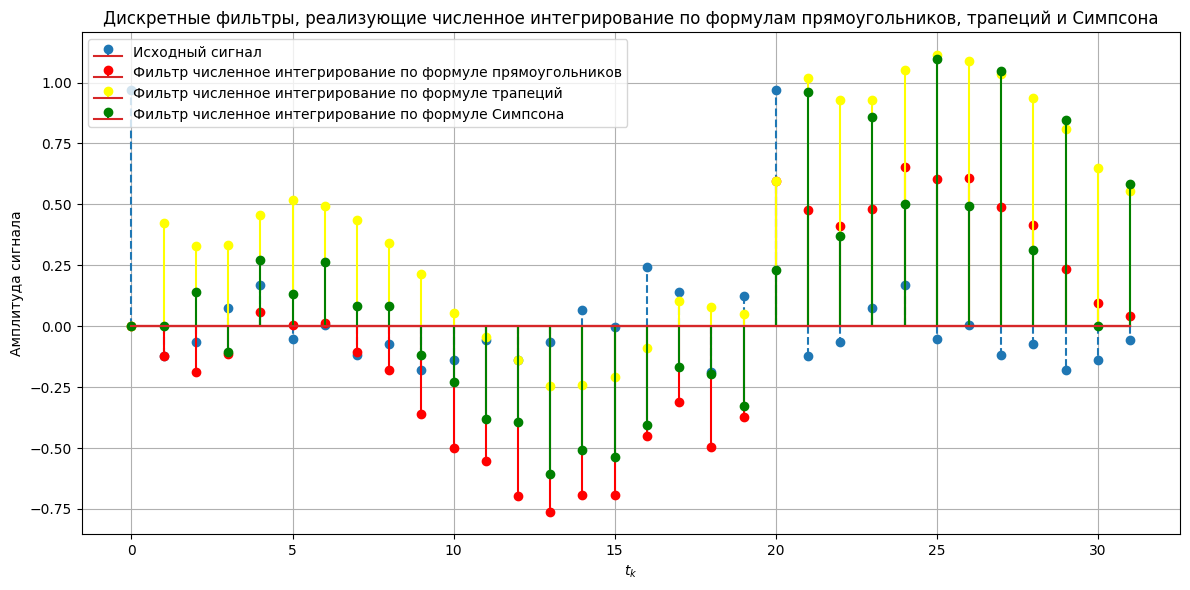

In [74]:
plt.figure(figsize=(12, 6))
plt.title('Дискретные фильтры, реализующие численное интегрирование по формулам прямоугольников, трапеций и Симпсона')
plt.xlabel('$t_k$')
plt.ylabel('Амплитуда сигнала')
plt.stem(t_discr, x_discr, '--',label='Исходный сигнал')
plt.stem(t_discr, filtered_integr_num_rect, 'red', label='Фильтр численное интегрирование по формуле прямоугольников')
plt.stem(t_discr, filtered_integr_num_trap, 'yellow', label='Фильтр численное интегрирование по формуле трапеций')
plt.stem(t_discr, filtered_integr_num_Simp, 'green', label='Фильтр численное интегрирование по формуле Симпсона')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

###### 6b. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

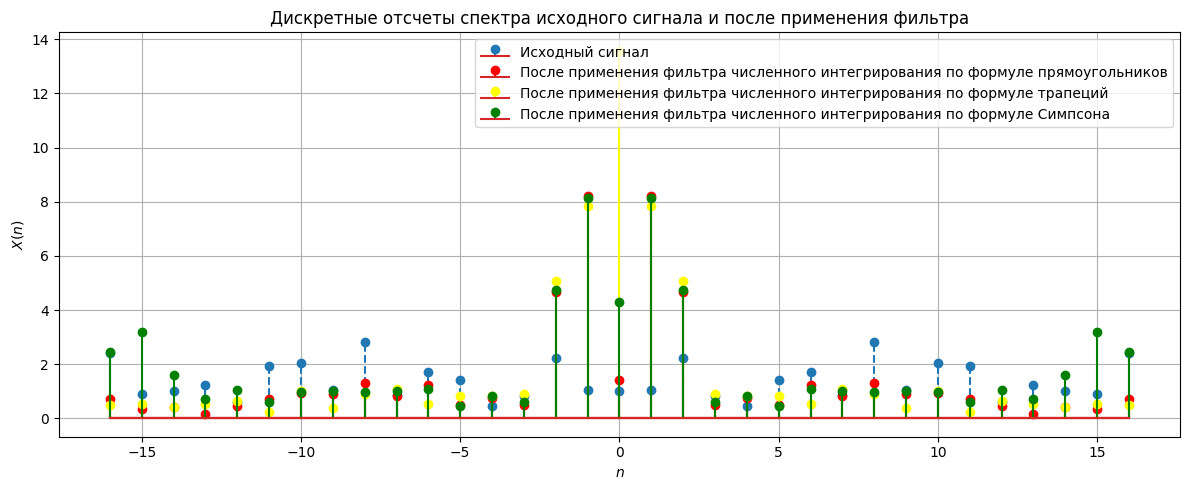

In [75]:
filtered_integr_num_rect_dft = [np.abs(dft(omega, filtered_integr_num_rect)) for omega in frec]
filtered_integr_num_trap_dft = [np.abs(dft(omega, filtered_integr_num_trap)) for omega in frec]
filtered_integr_num_Simp_dft = [np.abs(dft(omega, filtered_integr_num_Simp)) for omega in frec]

plt.figure(figsize=(12, 5))
plt.title('Дискретные отсчеты спектра исходного сигнала и после применения фильтра')
plt.xlabel('$n$')
plt.ylabel('$X(n)$')
plt.stem(n, X_dft, '--',label='Исходный сигнал')
plt.stem(n, filtered_integr_num_rect_dft, 'red', label='После применения фильтра численного интегрирования по формуле прямоугольников')
plt.stem(n, filtered_integr_num_trap_dft, 'yellow', label='После применения фильтра численного интегрирования по формуле трапеций')
plt.stem(n, filtered_integr_num_Simp_dft, 'green', label='После применения фильтра численного интегрирования по формуле Симпсона')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

###### 7b. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Оценив графики спектра дискретного входного сигнала, а также спектр дискретного сигнала на выходе из фильтров, соответствующих численному интегрированию по формулам прямоугольников, трапеций и Симпсона, можем сделать вывод, что значения спектра выходного сигнала относительно входного отображают характер передаточных функций этих фильтров (сопоставимы со значениями $H(\omega) = H(2 \pi \frac n N)$).

По графику дискретных отсчетов спектра фильтров численного интегрирования по формулам прямоугольников и трапеций можно видеть, что на средние частоты фильтры оказывают усиливающее действие, в то время как низкие и высокие активно подавляются; для фильтра численного интегрирования, основанного на формуле Симпсона можно видеть, что фильтр усиливает низкие, высокие, а такеж часоты в районе точки 0, но при этом подавляет частоты между низкими и нулевыми, и между высокими и нулевые, такое поведение согласуется с частотными характеристиками фильтров.

---

#### 9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

После исследования дискретных фильтров и визуализации их работы можно проинтерпретировать результат их действия на входной сигнал.

Так, фильтр, реализующий численное дифференцирование 1-го порядка, оказывает в основном подавляющий эффект на сигнал в частотной области. В отличие от него дискретные фильтры, реализующие численное интегрирование, в основном оказывают усиливающее действие. Но и их влияние отличается на разных частотах: фильтры, основанные на формулах прямоугольников и трапеций активно подавляют низкие и высокие частоты, а средние усиливаются, в это же время фильтр, основанный на формуле Симпсона усиливает низкие, высокие и частоты в районе точки 0, но подавляет частоты между казанными выше.

Каждый из фильтров имеет свои особые свойства и перед использованием нужно определить для каких нужд и задач планируется использовать фильтр необходимо использовать.

## Выводы

В ходе лабораторной работы был смоделирован аналоговый сигнал, представляющий собой сумму косинусоид. Данный сигнал был дискретизирован, были построены дискретные отсчеты спектра сигнала, построенные с помощью дискретного преобразования Фурье (ДПФ). К дискретизированному сигналу были применены различные фильтры (сглаживания по 5-ти и 9-ти точкам, фильтр, основанный на формуле численного дифференцирования 1-го порядка, а такеж фильтры, основанные на формулах прямоугольников, трапеций и Симпсона численного интегрирования). Каждый из фильтров был применен к начальному дискретному сигналу, после чего визуализирован новый полученный сигнал, его спектр (полученный с помощью ДПФ), а также был проведен сравнительный анализ влияния фильтров на сигнал.